In [1]:
#import neceassary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file

In [2]:
# load energy and weather datasets into pandas dataframes
energy = pd.read_csv('../raw_data/energy_data.csv')
weather_wide = pd.read_csv('../raw_data/weather_wide.csv')
weather_avg = pd.read_csv('../raw_data/weather_avg.csv')


In [3]:
energy['time'] = pd.to_datetime(energy['time'], yearfirst=True, utc=True)
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil gas                        35046 non-null  float64            
 4   generation fossil hard coal                  35046 non-null  float64            
 5   generation fossil oil                        35045 non-null  float64            
 6   generation hydro pumped storage consumption  35045 non-null  float64            
 7   generation hydro run-of-river and poundage   35045 non-null  float64            
 8   generation hydro water res

In [4]:
#let's set the time as index
energy.set_index('time', inplace = True)

In [5]:
energy.head(2)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92


In [6]:
weather_avg['dt_iso'] = pd.to_datetime(weather_avg['dt_iso'], yearfirst=True, utc=True)
weather_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   dt_iso      35064 non-null  datetime64[ns, UTC]
 1   temp        35064 non-null  float64            
 2   pressure    35064 non-null  float64            
 3   humidity    35064 non-null  float64            
 4   wind_speed  35064 non-null  float64            
 5   wind_deg    35064 non-null  float64            
 6   rain_1h     35064 non-null  float64            
 7   rain_3h     35064 non-null  float64            
 8   snow_3h     35064 non-null  float64            
 9   clouds_all  35064 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(9)
memory usage: 2.7 MB


In [7]:
#let's set the time as index
weather_avg.set_index('dt_iso', inplace = True)
weather_avg.head(2)

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
dt_iso,,,,,,,,,
2014-12-31 23:00:00+00:00,272.491463,1016.4,82.4,2.0,135.2,0.0,0.0,0.0,0.0
2015-01-01 00:00:00+00:00,272.512700,1016.2,82.4,2.0,135.8,0.0,0.0,0.0,0.0


In [8]:
weather_wide['dt_iso_'] = pd.to_datetime(weather_wide['dt_iso_'], yearfirst=True, utc=True)
weather_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   dt_iso_               35064 non-null  datetime64[ns, UTC]
 1   temp_Barcelona        35064 non-null  float64            
 2   temp_Bilbao           35064 non-null  float64            
 3   temp_Madrid           35064 non-null  float64            
 4   temp_Seville          35064 non-null  float64            
 5   temp_Valencia         35064 non-null  float64            
 6   pressure_Barcelona    35064 non-null  int64              
 7   pressure_Bilbao       35064 non-null  int64              
 8   pressure_Madrid       35064 non-null  int64              
 9   pressure_Seville      35064 non-null  int64              
 10  pressure_Valencia     35064 non-null  int64              
 11  humidity_Barcelona    35064 non-null  int64              
 12  humi

In [9]:
#let's set the time as index
weather_wide.set_index('dt_iso_', inplace = True)
#pd.set_option('display.max_columns', None)
weather_wide.head(2)

,temp_Barcelona,temp_Bilbao,temp_Madrid,temp_Seville,temp_Valencia,pressure_Barcelona,pressure_Bilbao,pressure_Madrid,pressure_Seville,pressure_Valencia,...,snow_3h_Barcelona,snow_3h_Bilbao,snow_3h_Madrid,snow_3h_Seville,snow_3h_Valencia,clouds_all_Barcelona,clouds_all_Bilbao,clouds_all_Madrid,clouds_all_Seville,clouds_all_Valencia
dt_iso_,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,281.625,269.657312,267.325,273.375,270.475,1035,1036,971,1039,1001,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2015-01-01 00:00:00+00:00,281.625,269.763500,267.325,273.375,270.475,1035,1035,971,1039,1001,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


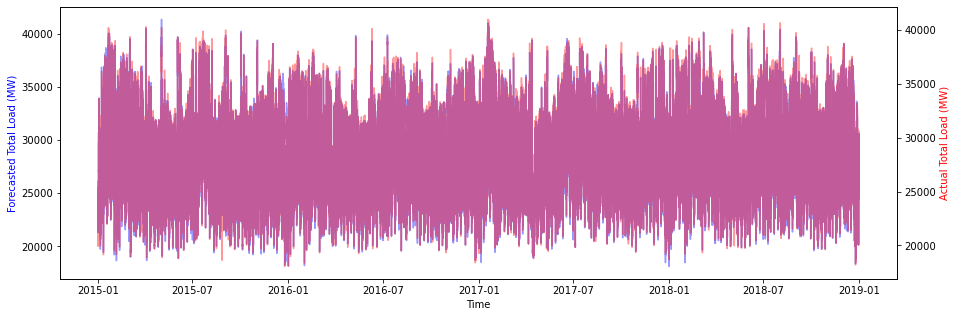

In [10]:
#Lets just take a look at a scatter plot of the time-series energy data.
fig, ax = plt.subplots()
ax.plot(energy.index, energy['total load forecast'], color = 'blue',alpha = 0.4)
ax.set_xlabel('Time')
ax.set_ylabel('Forecasted Total Load (MW)', color='blue')
ax2 = ax.twinx()
ax2.plot(energy.index, energy['total load actual'], color = 'red', alpha = 0.4)
ax2.set_ylabel('Actual Total Load (MW)', color = 'red')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.show()

On a macro scale, it's evident from the overlapping time series plots that forecasted and actual load are in general agreement but the never fully match up. Let's see what a single year lloks like.

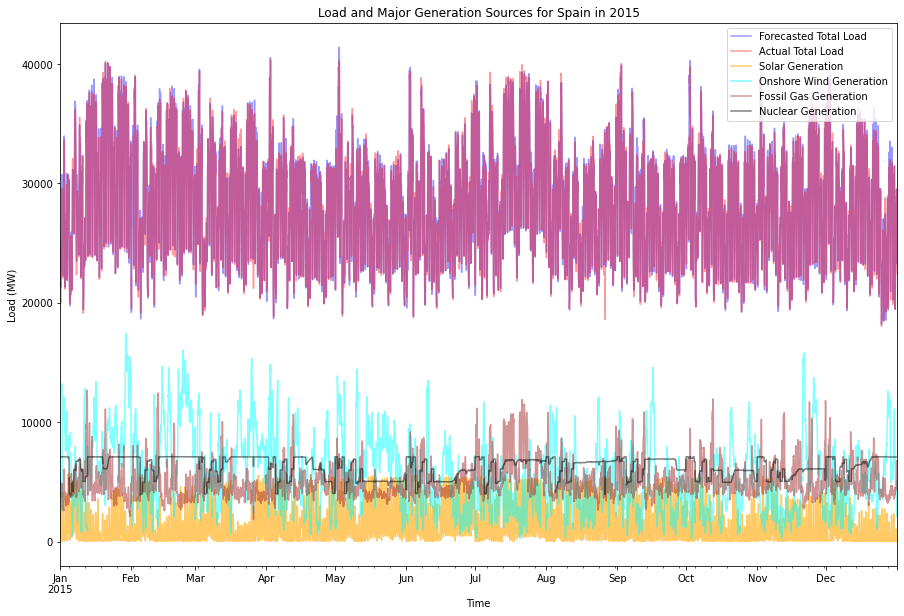

In [16]:
#Let's see what just a single year looks like:
energy_2015 = energy.loc['2015']
fig = plt.figure(figsize = (15,10))
energy_2015['total load forecast'].plot(label = 'Forecasted Total Load', color = 'blue',alpha = 0.4)
energy_2015['total load actual'].plot(label = 'Actual Total Load', color = 'red',alpha = 0.4)

#lets also see a few of the most important generation sources:
energy_2015['generation solar'].plot(label = 'Solar Generation', color = 'orange',alpha = 0.6)
energy_2015['generation wind onshore'].plot(label = 'Onshore Wind Generation', color = 'cyan',alpha = 0.5)
energy_2015['generation fossil gas'].plot(label = 'Fossil Gas Generation', color = 'brown',alpha = 0.5)
energy_2015['generation nuclear'].plot(label = 'Nuclear Generation', color = 'black',alpha = 0.5)

plt.ylabel('Load (MW)')
plt.xlabel("Time")
plt.title("Load and Major Generation Sources for Spain in 2015")
plt.legend()
plt.show()

'\n#lets also see a few of the most important generation sources:\nenergy_2015[\'generation solar\'].plot(label = \'Solar Generation\', color = \'orange\',alpha = 0.6)\nenergy_2015[\'generation wind onshore\'].plot(label = \'Onshore Wind Generation\', color = \'cyan\',alpha = 0.5)\nenergy_2015[\'generation fossil gas\'].plot(label = \'Fossil Gas Generation\', color = \'brown\',alpha = 0.5)\nenergy_2015[\'generation nuclear\'].plot(label = \'Nuclear Generation\', color = \'black\',alpha = 0.5)\n\nplt.ylabel(\'Load (MW)\')\nplt.xlabel("Time")\nplt.title("Load and Major Generation Sources for Spain in 2015")\nplt.legend()\nplt.show()\n'

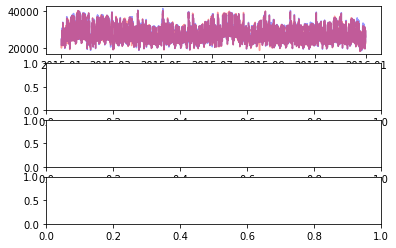

<Figure size 1080x720 with 0 Axes>

In [18]:
#Let's plot each year separately but view all 4 years together:
energy_2016 = energy.loc['2016']
energy_2017 = energy.loc['2017']
energy_2018 = energy.loc['2018']

fig, ax = plt.subplots(4,1)
plt.figure(figsize = (15,10))
ax[0].plot(energy_2015['total load forecast'], label = 'Forecasted Total Load', color = 'blue',alpha = 0.4)
ax[0].plot(energy_2015['total load actual'], label = 'Actual Total Load', color = 'red',alpha = 0.4)
'''
#lets also see a few of the most important generation sources:
energy_2015['generation solar'].plot(label = 'Solar Generation', color = 'orange',alpha = 0.6)
energy_2015['generation wind onshore'].plot(label = 'Onshore Wind Generation', color = 'cyan',alpha = 0.5)
energy_2015['generation fossil gas'].plot(label = 'Fossil Gas Generation', color = 'brown',alpha = 0.5)
energy_2015['generation nuclear'].plot(label = 'Nuclear Generation', color = 'black',alpha = 0.5)

plt.ylabel('Load (MW)')
plt.xlabel("Time")
plt.title("Load and Major Generation Sources for Spain in 2015")
plt.legend()
plt.show()
'''

We can see some weekly seasonality in the total/forecast load (with short dips seen weekly - these being weekends when offices are not operating). Overall the highest load seems to be in both January (when heating and lighting demand due to cold, short days are both high) and in July (when air conditioning demand is highest). We can see that Fossil Gas generation is high in July, likely do to increased air conditioning use. And we can also see that Onshore Wind generation is highest in late winter through late spring. Nuclear generation follows an odd pattern of reduced generation around the first week of every month; this may be due to some maintainance or safety processes performed monthly. This scale is too large to see much detail for the solar generation, as this has daily seasonality.

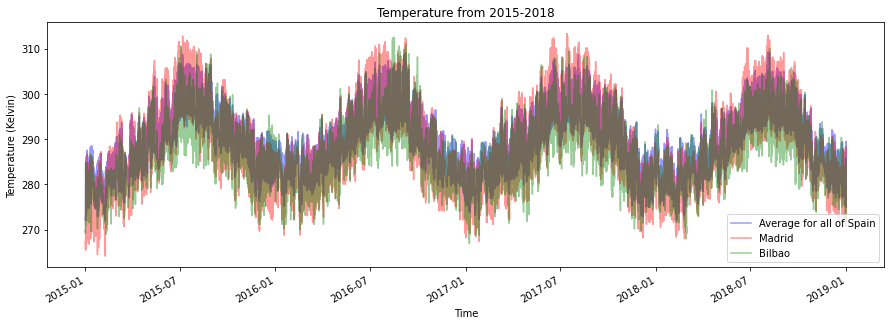

In [14]:
#some other plots we could try include temps for all 5 cities and the average temp to see what kind of spread there is
fig = plt.figure(figsize = (15,5))
weather_avg['temp'].plot(label = 'Average for all of Spain', color = 'blue',alpha = 0.4)
weather_wide['temp_Madrid'].plot(label = 'Madrid', color = 'red', alpha = 0.4)
weather_wide['temp_Bilbao'].plot(label = 'Bilbao', color = 'green', alpha = 0.4)
plt.xlabel('Time')
plt.ylabel('Temperature (Kelvin)')
plt.title("Temperature from 2015-2018")
plt.legend()
plt.show()

That's quite messy even with only the average and two cities. But we can see the yearly temperature trend and that the average matches the trend seen in Bilbao and Madrid. We can also glean that Madrid is hotter than average and Bilbao is cooler than average in the summer. Next let's try some scatter plots to see what features might be correlated to generation and load.

In [20]:
#Let's create a combined dataframe with energy and weather_avg
combined_avg = energy.join(weather_avg, on='time')
combined_avg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil gas                        35046 non-null  float64
 3   generation fossil hard coal                  35046 non-null  float64
 4   generation fossil oil                        35045 non-null  float64
 5   generation hydro pumped storage consumption  35045 non-null  float64
 6   generation hydro run-of-river and poundage   35045 non-null  float64
 7   generation hydro water reservoir             35046 non-null  float64
 8   generation nuclear                           35047 non-null  float64
 9   generation other         

In [21]:
#now that the df are merged we can delete rows with missing values
combined_avg = combined_avg.dropna()
combined_avg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35018 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35018 non-null  float64
 1   generation fossil brown coal/lignite         35018 non-null  float64
 2   generation fossil gas                        35018 non-null  float64
 3   generation fossil hard coal                  35018 non-null  float64
 4   generation fossil oil                        35018 non-null  float64
 5   generation hydro pumped storage consumption  35018 non-null  float64
 6   generation hydro run-of-river and poundage   35018 non-null  float64
 7   generation hydro water reservoir             35018 non-null  float64
 8   generation nuclear                           35018 non-null  float64
 9   generation other         

Text(0.5, 1.03, 'Energy and Average Weather Feature Correlation')

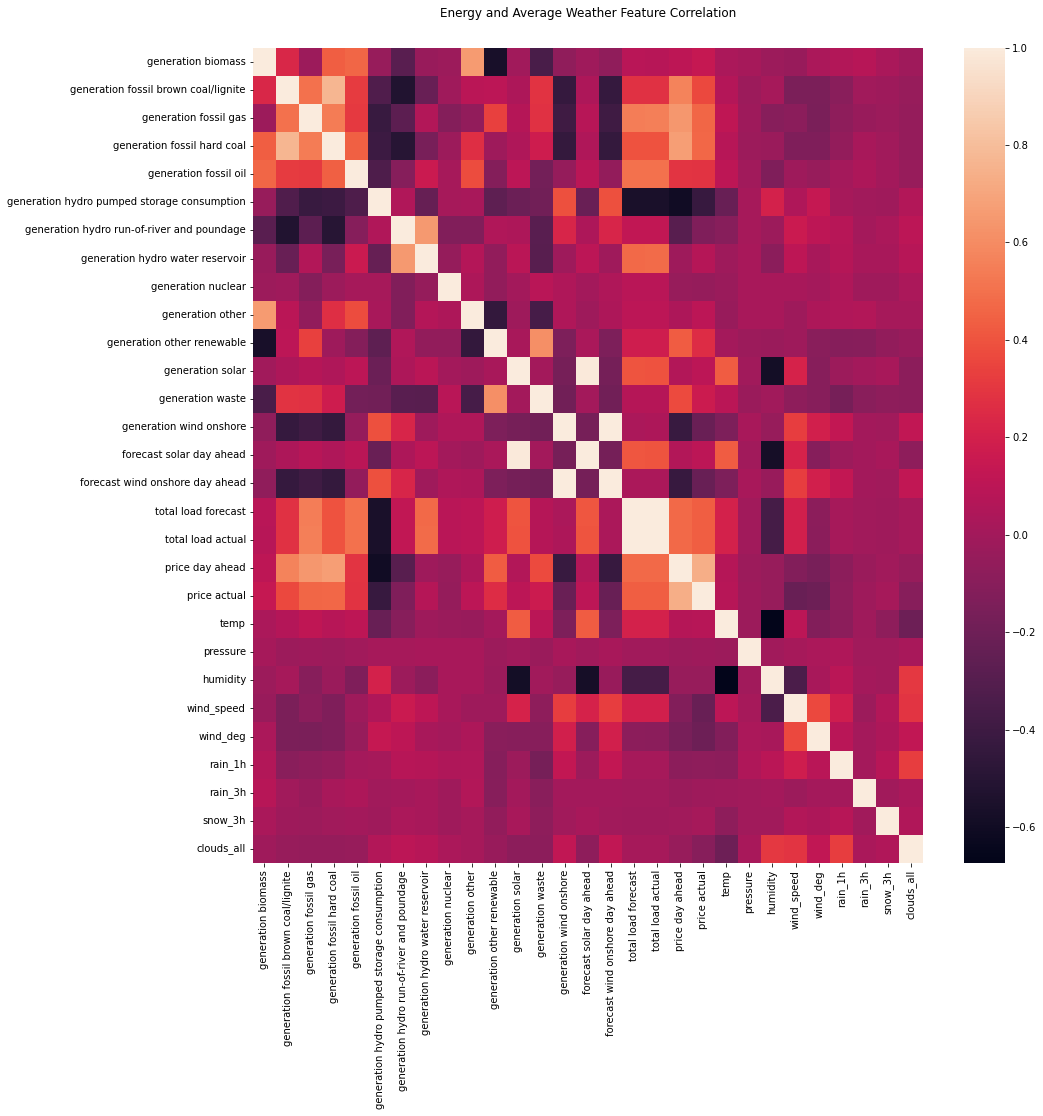

In [23]:
#let's try a heatmap on this df now
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(combined_avg.corr())
ax.set_title("Energy and Average Weather Feature Correlation",y=1.03)

Somewhat surprisingly, there are not a lot of strong correlations between our weather features and generation/load features. 
Some of the correlations we see include:
1. A strong negative correlation between humidity and: temperature, forecast solar, and solar generation. This indicates that humidity must be highest at night when temp is lower which is also when solar is not being generated. But humidity is more highly correlated with solar than temperature is with solar (probably due to the fact that solar is still generated in the winter when temperatures are low).
2. Fossil generation is moderately positively correlated with price actual and forecasted price, indicating that energy prices ar higher when more fossil generation is needed to meet demand.
3. Wind speed is only weakly positively correlated with wind generation.
4. There is a moderate positive correlation between forecast price and waste generation and other renewable generation, but then almost zero correlation between these two energy sources and actual price. This could mean that there is discrepancy between how much generation from waste and other renewables planners would like to use and how much actually ends up getting used to meet demand?

This may be an indication that time series analysis will provide a better forecast than regression, but we shall see...

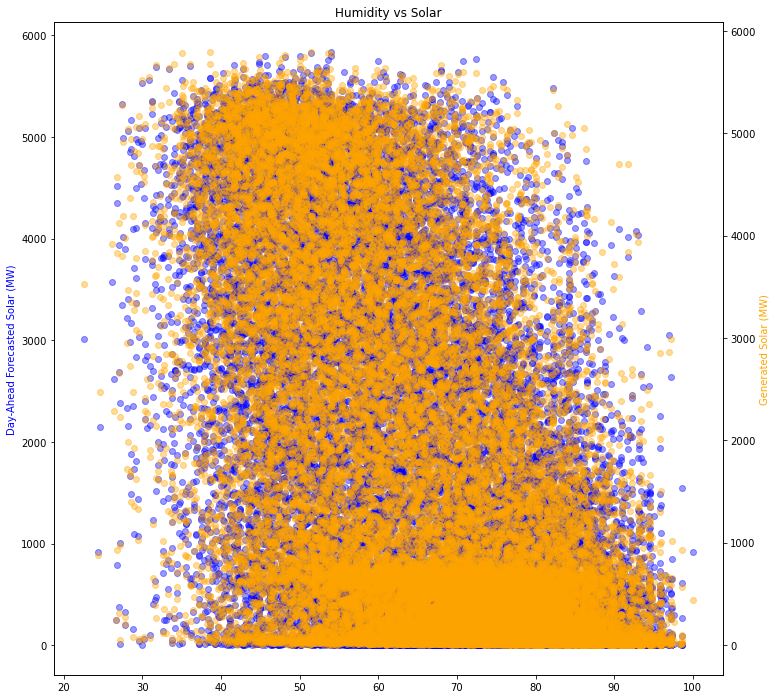

In [29]:
#Let's plot up some of the correlation we noted from the heatmap
#First, humidity vs forecast and actual solar generation and then the same for temperature
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(combined_avg['humidity'], combined_avg['forecast solar day ahead'], color = 'blue', alpha = 0.4)
ax2 = ax.twinx()
ax2.scatter(combined_avg['humidity'], combined_avg['generation solar'], color = 'orange', alpha = 0.4)
plt.xlabel('Humidity (%)')
ax.set_ylabel('Day-Ahead Forecasted Solar (MW)', color='blue')
ax2.set_ylabel('Generated Solar (MW)', color='orange')
plt.title("Humidity vs Solar")
plt.show()


We indeed see a moderate negative correlation, and then a whole lot of points with zero solar and high humidity (indicating night time).

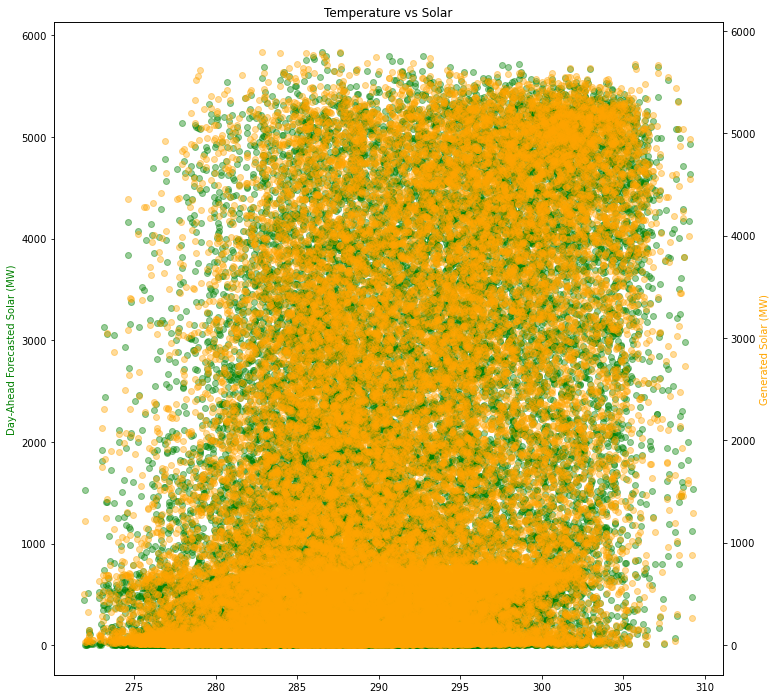

In [32]:
#First, humidity vs forecast and actual solar generation and then the same for temperature
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(combined_avg['temp'], combined_avg['forecast solar day ahead'], color = 'green', alpha = 0.4)
ax2 = ax.twinx()
ax2.scatter(combined_avg['temp'], combined_avg['generation solar'], color = 'orange', alpha = 0.4)
plt.xlabel('Temperature (Kelvin)')
ax.set_ylabel('Day-Ahead Forecasted Solar (MW)', color='green')
ax2.set_ylabel('Generated Solar (MW)', color='orange')
plt.title("Temperature vs Solar")
plt.show()

We generally see a weak to moderate positive correlation with temperature, and again a huge band with zero to near zero solar generation (night time).